# TP 7 Machines à vecteur de support

# Importation des librairies necessaires au travail

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Lecture des fichiers de données

In [122]:
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(863, 3)

In [123]:
# Notons que nous navons pas besoin d'intercept pour l'MVS de sklearn
X=data[:,:-1]
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [124]:
print('X', X.shape ,' y ', y.shape)

X (863, 2)  y  (863, 1)


In [ ]:
poly_svc = svm.SVC(kernel='poly', degree=5, C=C).fit(X, y.ravel())

In [126]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [153]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y)

In [155]:
C = 1.0
svc_linear = svm.SVC(kernel='linear', C=C).fit(X_train, y_train.ravel())

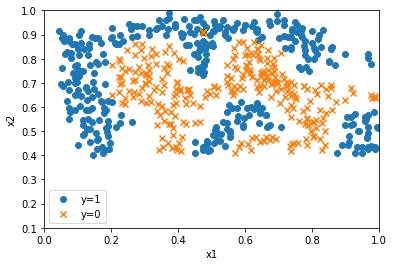

In [152]:
plt.scatter(X_train[np.where(y_train==1),0],X_train[np.where(y_train==1),1], label="y=1",marker ='o')
plt.scatter(X_train[np.where(y_train==0),0],X_train[np.where(y_train==0),1], label="y=0",marker ='x')
a = np.linspace(-1, 1.5, 100)
b = np.linspace(-1, 1.5, 100)
z = np.zeros((len(a), len(b)))
# for i in range(len(a)):
  # for j in range(len(b)):
    # z[i,j] = poly_svc.predict(np.c_[a[i], b[j]])
# plt.contour(a,b,z,0, colors='green', linewidth=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.axis([0, 1, 0.1, 1])
#plt.axis([X[:, 0].min()-0.1, X[:, 0].max()+0.1, X[:, 1].min()-0.1, X[:, 1].max()+0.1])
plt.show()

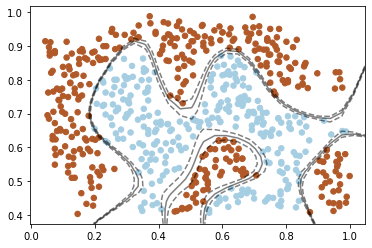

In [156]:
# clf = svm.SVC(kernel='linear', C=C)
# clf = svm.SVC(kernel='poly', degree=3, C=C)
clf = svm.SVC(kernel='rbf', C=100000)
clf.fit(X_train, y_train.ravel())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# ax.contour(
#     XX, colors="k" ,levels=[0],alpha=0.5, linestyles=["-"]
# )
# plot support vectors
# ax.scatter(
#     clf.support_vectors_[:, 0],
#     clf.support_vectors_[:, 1],
#     s=100,
#     linewidth=1,
#     facecolors="none",
#     edgecolors="k",
# )
plt.show()

In [141]:
predict = clf.predict(X_test)
print(clf.score(X_test,y_test))
correct = 0
for i in range(len(predict)):
    if predict[i] == y_test[i]:
        correct+=1
print(correct/ len(y_test))
y_test = np.squeeze(y_test)
print(np.sum(y_test== predict)/len(y_test))
# print(len(y_test))
# print(predict.reshape(-1,1).shape)
# print(y_test.shape)
# predict_mean = np.mean(y_test==predict)*100
# predict_mean
# print(predict==y_test)

0.9768339768339769
0.9768339768339769
0.9768339768339769
